In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# параметри виведення
pd.set_option("display.max_columns", 500)  # кількість колонок
pd.set_option("display.max_rows", 1000)  # кількість рядків
pd.set_option("display.max_colwidth", 300)  # ширина колонок
pd.set_option("display.precision", 7)  # кількість знаків після коми

# вимикаємо зайві попередження
import warnings

warnings.filterwarnings("ignore")

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
# https://www.kaggle.com/datasets/cashncarry/fifa-23-complete-player-dataset
data = pd.read_csv("players_fifa23.csv")

In [4]:
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,Positions,BestPosition,Club,ValueEUR,WageEUR,ReleaseClause,ClubPosition,ContractUntil,ClubNumber,ClubJoined,OnLoad,NationalTeam,NationalPosition,NationalNumber,PreferredFoot,IntReputation,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,0,2190,452,RW,CAM,Paris Saint-Germain,54000000,195000,99900000,RW,2023.0,30.0,2021,False,Argentina,RW,10.0,Left,5,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,0,2147,455,"CF,ST",CF,Real Madrid CF,64000000,450000,131199999,CF,2023.0,9.0,2009,False,France,ST,19.0,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,0,2205,458,ST,ST,FC Barcelona,84000000,420000,172200000,ST,2025.0,9.0,2022,False,Poland,ST,9.0,Right,5,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,0,2303,483,"CM,CAM",CM,Manchester City,107500000,350000,198900000,CM,2025.0,17.0,2015,False,Belgium,RF,7.0,Right,4,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,4,2177,470,"ST,LW",ST,Paris Saint-Germain,190500000,230000,366700000,ST,2024.0,7.0,2018,False,France,ST,10.0,Right,4,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [5]:
data.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

([<matplotlib.patches.Wedge at 0x126238850>,
 [Text(0.7961464059964325, 0.7590460461783355, 'Ліва нога'),
  Text(-0.7961464415299415, -0.7590460089080316, 'Права нога')],
 [Text(0.43426167599805404, 0.4140251160972738, '24.2 %'),
  Text(-0.43426169537996806, -0.4140250957680172, '75.8 %')])

Text(0.5, 1.0, 'Яка нога є основною у футболістів?')

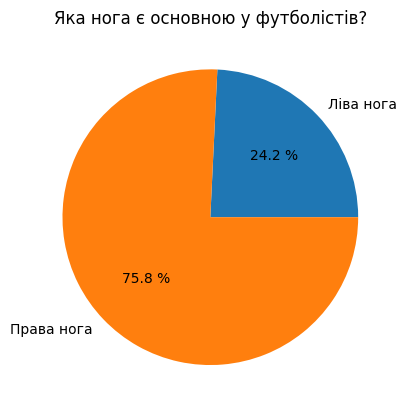

In [15]:
left = data[data["PreferredFoot"] == "Left"].count()[0]
right = data[data["PreferredFoot"] == "Right"].count()[0]

plt.pie(
    [left, right],
    labels=["Ліва нога", "Права нога"],
    autopct="%.1f %%",
)
plt.title("Яка нога є основною у футболістів?")
plt.show()

In [16]:
data["Club"].unique()

array(['Paris Saint-Germain', 'Real Madrid CF', 'FC Barcelona',
       'Manchester City', 'Liverpool', 'FC Bayern München',
       'Manchester United', 'Tottenham Hotspur', 'Atlético de Madrid',
       'Chelsea', 'AC Milan', 'Lazio', 'Inter', 'Roma', 'Juventus',
       'Eintracht Frankfurt', 'Villarreal CF', 'RB Leipzig',
       'Borussia Dortmund', 'Real Betis Balompié', 'RC Celta de Vigo',
       'Sevilla FC', 'Leicester City', 'Bayer 04 Leverkusen',
       'Borussia Mönchengladbach', 'Galatasaray SK',
       'Club Nacional de Football', 'Ajax', 'U.S. Sassuolo Calcio',
       'Arsenal', 'Aston Villa', 'AS Monaco', 'Toronto FC',
       'VfL Wolfsburg', 'Athletic Club de Bilbao', 'Newcastle United',
       'Los Angeles FC', 'AFC Richmond', 'West Ham United',
       'Real Sociedad', 'TSG Hoffenheim', 'Wolverhampton Wanderers',
       'Palmeiras', 'Napoli', 'PSV', 'Atalanta', 'OGC Nice', 'SL Benfica',
       'Getafe CF', 'Al Nassr', 'Valencia CF', 'FC Porto',
       'Sport-Club Freiburg'

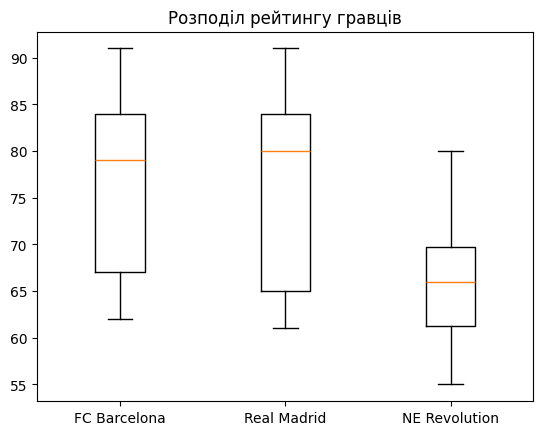

In [17]:
barcelona = data[data["Club"] == "FC Barcelona"]["Overall"]
madrid = data[data["Club"] == "Real Madrid CF"]["Overall"]
revs = data[data["Club"] == "New England Revolution"]["Overall"]

plt.boxplot(
    [barcelona, madrid, revs],
    labels=["FC Barcelona", "Real Madrid", "NE Revolution"],
)
plt.title("Розподіл рейтингу гравців")
plt.show();

# діаграма типу "ящик з вусами" (boxplot) показує розподіл даних за допомогою квартилів

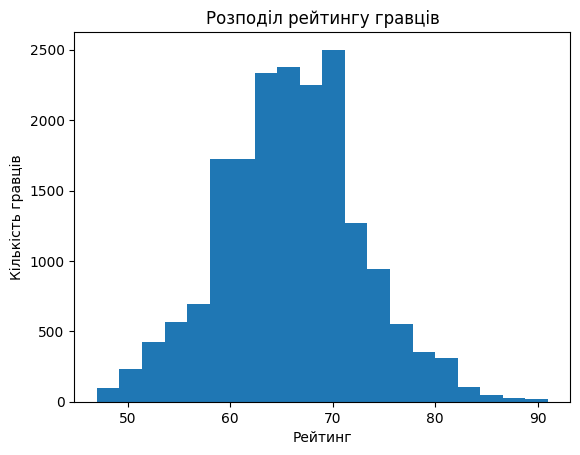

In [22]:
plt.hist(data["Overall"], bins=20)

plt.title("Розподіл рейтингу гравців")
plt.xlabel("Рейтинг")
plt.ylabel("Кількість гравців")
plt.show();

# Побудова гістаграми 

In [23]:
plt.style.available

# В Matplotlib доступно 26 стилів оформлення графіків.

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

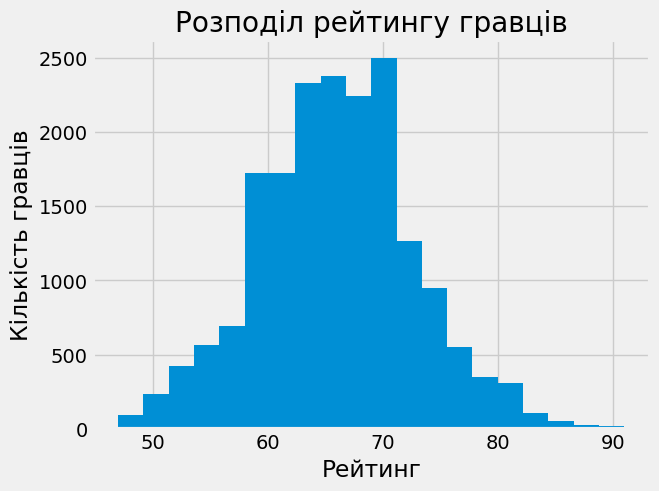

In [24]:
plt.style.use("fivethirtyeight")
plt.hist(data["Overall"], bins=20)
plt.title("Розподіл рейтингу гравців")
plt.xlabel("Рейтинг")
plt.ylabel("Кількість гравців")
plt.show();

### demo to sns

In [25]:
# відбираю числові ознаки з датасету tips
df = data.select_dtypes(include=["float64", "int64"])
df.columns

Index(['ID', 'Age', 'Height', 'Weight', 'Overall', 'Potential', 'Growth',
       'TotalStats', 'BaseStats', 'ValueEUR', 'WageEUR', 'ReleaseClause',
       'ContractUntil', 'ClubNumber', 'ClubJoined', 'NationalNumber',
       'IntReputation', 'WeakFoot', 'SkillMoves', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'C

In [26]:
df = df[
    [
        "Overall",
        "Age",
        "Height",
        "Weight",
        "PassingTotal",
        "PhysicalityTotal",
        "ShortPassing",
        "Crossing",
        "Finishing",
        "HeadingAccuracy",
        "ShortPassing",
        "Volleys",
    ]
]

In [27]:
df.shape

(18539, 12)

<Axes: >

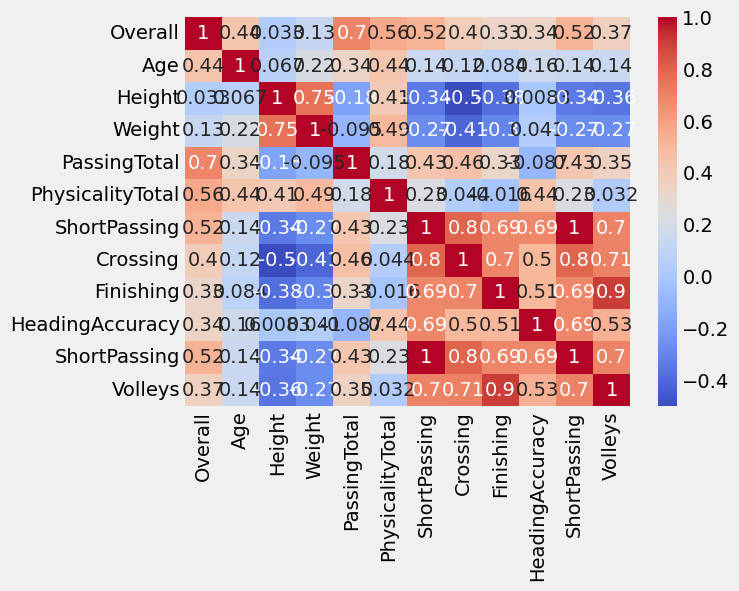

In [31]:
# heatmap - це теплова карта
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

<Axes: >

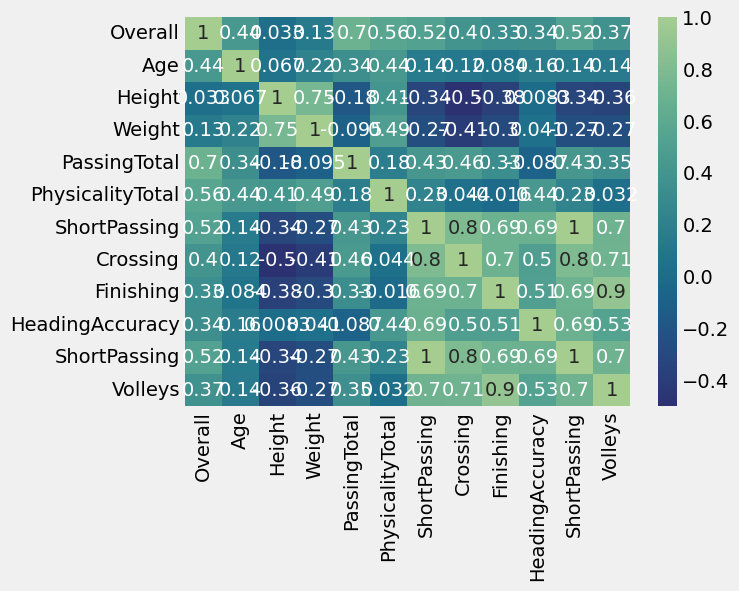

In [32]:
# heatmap - це теплова карта
sns.heatmap(df.corr(), cmap="crest_r", annot=True)

<Axes: >

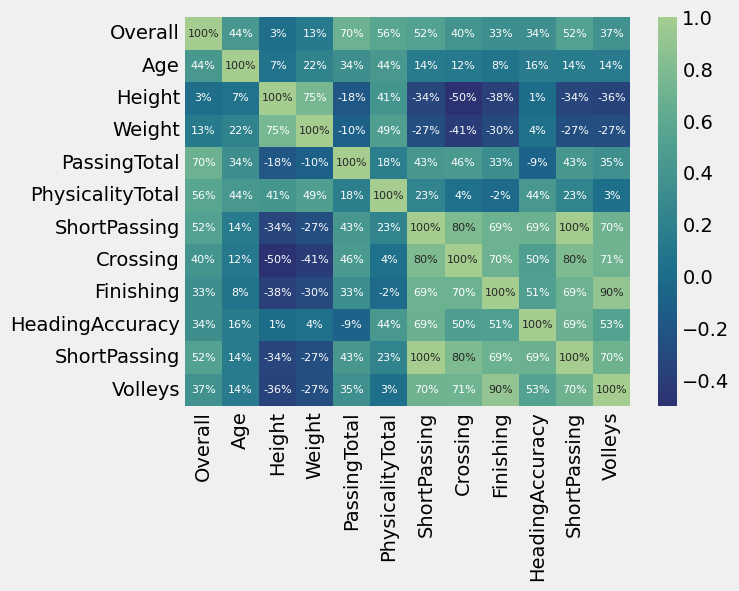

In [34]:
# зменшити шрифт анотацій
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap="crest_r", annot=True, fmt=".0%", annot_kws={"fontsize": 8})
# fmt - формат виведення значень   annot_kws - параметри анотацій (розмір шрифту) , cmap - палітра кольорів (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
